In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib inline

**DEFININDO A BASE DE DADOS E FAZENDO UMA PRÉ-SELEÇÃO**

In [548]:
# definindo a variável principal e mudando o nome das colunas
dados = pd.read_table("pes2013P1.csv", sep = ",")

In [549]:
# fazendo a seleção geral
dados = dados[(dados.V9042 == 2)&(dados.V9005 == 1)&(dados.V0402 == 1)&(dados.V8005 > 15)&(dados.V4718 < 99999999999)] # + de 15 anos, carteira ass, pessoa de ref, 1 emprego

**AJUSTANDO A BASE DE DADOS PARA FAZER AS ANÁLISES** 

In [550]:
# renomeando as colunas da tabela geral
colunas = ["UF", "SEXO", "IDADE", "COND_FAM", "COR", "TRABALHOU_REF_WEEK", "N_TRAB_REF_WEEK", "POSIÇÃO_REF_WEEK", "SETOR_REF_WEEK", "CARTEIRA_ASS_REF_WEKK", "ANOS_DE_TRAB_REF_DATE", "ANOS_DE_ESTUDO", "HORAS_DE_TRAB_10PLUS_REF_WEEK", "INSTRUC_PLUS_ALCANÇADA", "REND_MENSAL_TRAB_PRINC_10PLUS"]

columns = {}
i = 0
for c in dados.columns:
    
    columns[c] = colunas[i]
    i+=1
    
dados.rename(columns=columns, inplace=True)

In [551]:
regioes = ["Sul", "Norte", "Nordeste", "Sudeste", "Centro-Oeste"]

In [552]:
# criando a coluna REGIAO
dados["REGIAO"] = "Sul"
condition1 = dados.UF <= 17
condition2 = (dados.UF > 17) & (dados.UF <= 29)
condition3 = (dados.UF > 29) & (dados.UF <= 35)
condition4 = dados.UF > 43

dados.loc[condition1, "REGIAO"] = "Norte"
dados.loc[condition2, "REGIAO"] = "Nordeste"
dados.loc[condition3, "REGIAO"] = "Sudeste"
dados.loc[condition4, "REGIAO"] = "Centro-Oeste"

In [553]:
# mudando a notação dos valores da variável "COR"
racas = ["Indígena", "Branca", "Negra", "Amarela", "Parda"]

dados.COR = dados.COR.astype("category")
dados.COR.cat.categories = racas

In [554]:
# mudando a notação dos valores da variável "SEXO"
sexos = ["Masculino", "Feminino"]

dados.SEXO = dados.SEXO.astype("category")
dados.SEXO.cat.categories = sexos

In [555]:
# mudando a notação do valor da variável "HORAS_DE_TRAB_10PLUS_REF_WEEK" e recriando os homens e mulheres
horas = ["0-14", "15-39", "40-44", "45-48", "49+"]

dados.HORAS_DE_TRAB_10PLUS_REF_WEEK = dados.HORAS_DE_TRAB_10PLUS_REF_WEEK.astype("category")
dados.HORAS_DE_TRAB_10PLUS_REF_WEEK.cat.categories = horas

In [556]:
# separando homens e mulheres
homens = dados[dados.SEXO == "Masculino"]
mulheres = dados[dados.SEXO == "Feminino"]

In [557]:
# retirando os outliers que consideramos despresíveis

dados = dados[(dados.REND_MENSAL_TRAB_PRINC_10PLUS != dados.REND_MENSAL_TRAB_PRINC_10PLUS.max()) & (dados.REND_MENSAL_TRAB_PRINC_10PLUS != dados.REND_MENSAL_TRAB_PRINC_10PLUS.min())] 
homens = homens[(homens.REND_MENSAL_TRAB_PRINC_10PLUS != homens.REND_MENSAL_TRAB_PRINC_10PLUS.max()) & (homens.REND_MENSAL_TRAB_PRINC_10PLUS != homens.REND_MENSAL_TRAB_PRINC_10PLUS.min())]

ANÁLISE 1 
=====

**PARÂMETRO A SER ANALISADO:** Média salarial

**CRITÉRIO DE SELEÇÃO:** Raça

In [558]:
# obtendo o rend médio de cada um dos genêros de cada uma das raças

# INDEX: [Indígena, Branca, Negra, Amarela, Parda]

rendMedioHomens = []
rendMedioMulheres = []

for r in racas:
    
    homem = homens[homens.COR == r]
    mulher = mulheres[mulheres.COR == r]
    
    rendMedioHomem = homem.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    rendMedioMulher = mulher.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    
    rendMedioHomens.append(rendMedioHomem)
    rendMedioMulheres.append(rendMedioMulher)

In [559]:
# obtendo o rend médio de cada um dos genêros por raça

# INDEX: [[IndígenaH, IndígenaM], [BrancaH, BrancaM], [NegraH, NegraM], [AmarelaH, AmarelaM], [PardaH, PardaM]]

homensXMulheres = []

for i in range(len(rendMedioHomens)):
    
    homemXMulher = [rendMedioHomens[i],rendMedioMulheres[i]]
    
    homensXMulheres.append(homemXMulher)

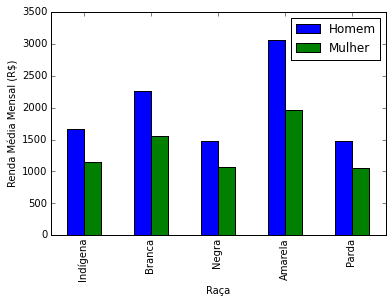

In [560]:
# plotando o gráfico conclusivo da ANÁLISE 1
dataForGraph1 = pd.DataFrame(homensXMulheres, columns=["Homem", "Mulher"], index=racas)
plot1 = dataForGraph1.plot(kind='bar')
plot1.set_ylabel("Renda Média Mensal (R$)")
plot1.set_xlabel("Raça")

#ANÁLISE 2

**PARÂMETRO A SER ANALISADO:** Média salarial

**CRITÉRIO DE SELEÇÃO:** Região em que reside

In [561]:
# obtendo o rend médio de cada um dos genêros de cada uma das regiões

# INDEX: [Sul, Norte, Nordeste, Sudeste, Centro-Oeste]

rendMedioHomensReg = []
rendMedioMulheresReg = []

for r in regioes:
    
    homem = homens[homens.REGIAO == r]
    mulher = mulheres[mulheres.REGIAO == r]
    
    rendMedioHomem = homem.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    rendMedioMulher = mulher.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    
    rendMedioHomensReg.append(rendMedioHomem)
    rendMedioMulheresReg.append(rendMedioMulher)

In [562]:
# obtendo o rend médio de cada um dos gêneros por região

# INDEX: [[SulH, SulM], [NorteH, NorteM], [SudesteH, SudesteM], [Centro-OesteH, Centro-OesteM]]

homensXMulheresReg = []

for i in range(len(rendMedioHomensReg)):
    
    homemXMulher = [rendMedioHomensReg[i],rendMedioMulheresReg[i]]
    
    homensXMulheresReg.append(homemXMulher)

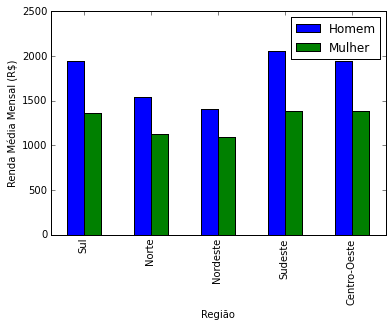

In [563]:
# plotando o gráfico conclusivo da ANÁLISE 1
dataForGraph2 = pd.DataFrame(homensXMulheresReg, columns=["Homem", "Mulher"], index=regioes)
plot2 = dataForGraph2.plot(kind='bar')
plot2.set_ylabel("Renda Média Mensal (R$)")
plot2.set_xlabel("Região")

#ANÁLISE 3

**PARÂMETRO A SER ANALISADO:** Média Salarial

**CRITÉRIO DE SELEÇÃO:** Carga horária de trabalho semanal

In [564]:
# obtendo a renda média mensal de acordo com a carga horária semanal de cada sexo

# INDEX: horas

rendMedioHorasH = []
rendMedioHorasM = []
for i in horas:
    
    meanH = homens[homens.HORAS_DE_TRAB_10PLUS_REF_WEEK == i].REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    meanM = mulheres[mulheres.HORAS_DE_TRAB_10PLUS_REF_WEEK == i].REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    
    rendMedioHorasH.append(meanH)
    rendMedioHorasM.append(meanM)

In [565]:
# obtendo a renda média mensal de acordo com a carga horária semanal 

# INDEX: [[0-14H, 0-14M], [14-39H, 14-39M], [40-44H, 40-44M], [45-48H, 45-48M], [49+H, 49+M]]

homensXMulheresHoras = []

for i in range(len(rendMedioHorasH)):
    
    homemXMulher = [rendMedioHorasH[i],rendMedioHorasM[i]]
    
    homensXMulheresHoras.append(homemXMulher)

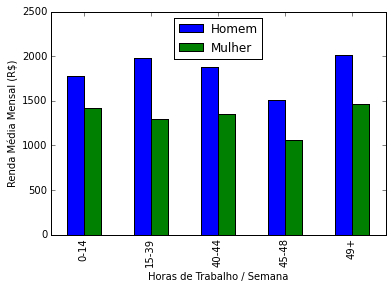

In [566]:
dataForGraph3 = pd.DataFrame(homensXMulheresHoras, columns=["Homem", "Mulher"], index=horas)
plot3 = dataForGraph3.plot(kind='bar')
plot3.set_ylabel("Renda Média Mensal (R$)")
plot3.set_xlabel("Horas de Trabalho / Semana")

#ANÁLISE 4

**PARÂMETRO A SER ANALISADO:** Número de indivíduos

**CRITÉRIO DE SELEÇÃO:** Nível do rendimento mensal ou "Faixas Salariais"

In [567]:
# separando as rendas por quartis

sortedRenda = sorted(dados.REND_MENSAL_TRAB_PRINC_10PLUS)

# INDEX: [0 - 30902]

q1 = (sortedRenda[7725]+sortedRenda[7726])/2
q2 = sortedRenda[15451] # ou dados.REND_MENSAL_TRAB_PRINC_10PLUS.median()
q3 = (sortedRenda[23176]+sortedRenda[23177])/2

In [568]:
# dividindo as rendas em quatro grandes grupos:

# g1 = 25% maiores salários
# g2 = 50% maiores salários mas não os 25% maiores
# g3 = 50% menores salários mas não os 25% menores
# g4 = 25% menores salários

for s in sexos:

    if s == "Masculino":
    
        g1H = homens[homens.REND_MENSAL_TRAB_PRINC_10PLUS >= q3].REND_MENSAL_TRAB_PRINC_10PLUS
        g2H = homens[(homens.REND_MENSAL_TRAB_PRINC_10PLUS >= q2) & (homens.REND_MENSAL_TRAB_PRINC_10PLUS < q3)].REND_MENSAL_TRAB_PRINC_10PLUS
        g3H = homens[(homens.REND_MENSAL_TRAB_PRINC_10PLUS >= q1) & (homens.REND_MENSAL_TRAB_PRINC_10PLUS < q2)].REND_MENSAL_TRAB_PRINC_10PLUS
        g4H = homens[homens.REND_MENSAL_TRAB_PRINC_10PLUS < q1].REND_MENSAL_TRAB_PRINC_10PLUS
        
    else:
        
        g1M = mulheres[mulheres.REND_MENSAL_TRAB_PRINC_10PLUS >= q3].REND_MENSAL_TRAB_PRINC_10PLUS
        g2M = mulheres[(mulheres.REND_MENSAL_TRAB_PRINC_10PLUS >= q2) & (mulheres.REND_MENSAL_TRAB_PRINC_10PLUS < q3)].REND_MENSAL_TRAB_PRINC_10PLUS
        g3M = mulheres[(mulheres.REND_MENSAL_TRAB_PRINC_10PLUS >= q1) & (mulheres.REND_MENSAL_TRAB_PRINC_10PLUS < q2)].REND_MENSAL_TRAB_PRINC_10PLUS
        g4M = mulheres[mulheres.REND_MENSAL_TRAB_PRINC_10PLUS < q1].REND_MENSAL_TRAB_PRINC_10PLUS

In [569]:
# obtendo a renda média de cada uma das faixas salariais para cada um dos sexos

# INDEX: [[g1H, g1M], [g2H,g2M], [g3H, g3M], [g4H, g4M]]

homensXMulheresSal = [[len(g1H), len(g1M)], [len(g2H), len(g2M)], [len(g3H), len(g3M)], [len(g4H), len(g4M)]]

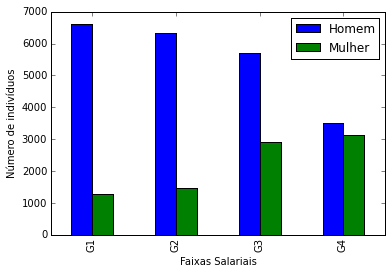

In [570]:
# plotando o gráfico conclusivo da ANÁLISE 4

dataForGraph4 = pd.DataFrame(homensXMulheresSal, columns=["Homem", "Mulher"], index=["G1", "G2", "G3", "G4"])
plot4 = dataForGraph4.plot(kind='bar')
plot4.set_ylabel("Número de indivíduos")
plot4.set_xlabel("Faixas Salariais")

#ANÁLISE 5

**PARÂMETRO A SER ANALISADO:** Porcentagem sobre o número total de indivíduos

**CRITÉRIO DE SELEÇÃO:** Nível do rendimento mensal ou "Faixas Salariais"

In [571]:
dados = dados.sort(["REND_MENSAL_TRAB_PRINC_10PLUS"])

In [572]:
gHomens = []
gMulheres = []

for e in homensXMulheresSal:
    
    gHomens.append(e[0])
    gMulheres.append(e[1])

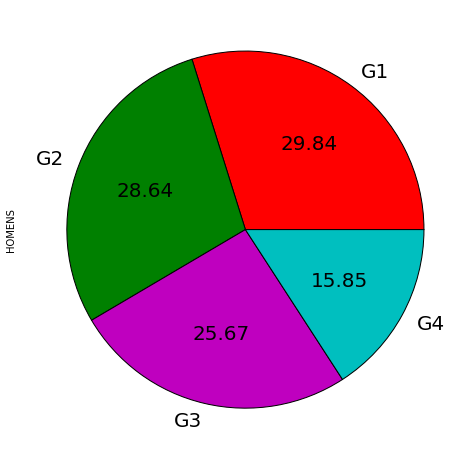

In [592]:
# plotando os gráfico da análise 5

dataForGraph5 = pd.Series(gHomens, index=["G1", "G2", "G3", "G4"],name='HOMENS')
plot5 = dataForGraph5.plot(kind='pie',figsize=(8, 8), autopct='%.2f',fontsize=20,colors=['r', 'g', 'm', 'c'])

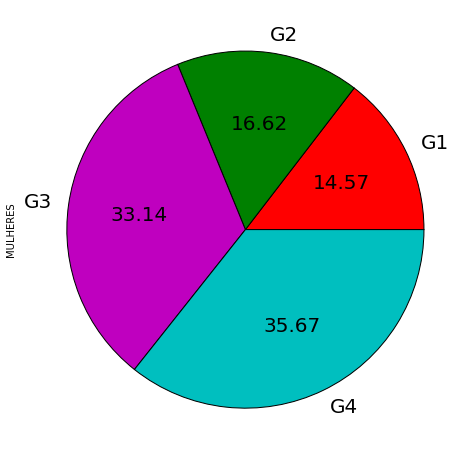

In [593]:
dataForGraph5 = pd.Series(gMulheres, index=["G1", "G2", "G3", "G4"],name='MULHERES')
plot5 = dataForGraph5.plot(kind='pie',figsize=(8, 8), autopct='%.2f',fontsize=20,colors=['r', 'g', 'm', 'c'])

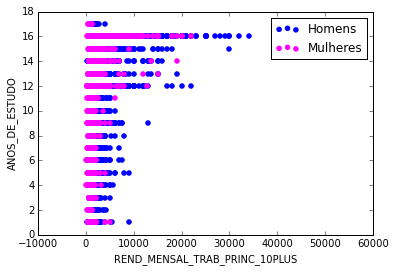

In [575]:

ax = homens.plot(kind='scatter', x='REND_MENSAL_TRAB_PRINC_10PLUS', y='ANOS_DE_ESTUDO',
    color='Blue', label='Homens');
  
mulheres.plot(kind='scatter', x='REND_MENSAL_TRAB_PRINC_10PLUS', y='ANOS_DE_ESTUDO',
    color='Magenta', label='Mulheres', ax=ax);